In [1]:
import pandas as pd
import json
import re
import unicodedata
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Get Data
from extractResponse import data_expanded
print(data_expanded.columns)
columns=["price","resp_totalPrice","diff_price","duration","requirements_textual","inquired","resp_ZusatzInfo","resp_complete","resp_confidence","comment_price","comment_important","comment_important","resp_missverständliche Aspekte","resp_Zu erbringende Leistungen","resp_Rechenweg","resp_Kommentare","response"  ]

data = data_expanded[columns]
#print(data_expanded)

   totalPrice  totalPriceLow  totalPriceHigh  \
0         145            145             145   

                                          ZusatzInfo  complete  confidence  \
0  Bitte bestätigen Sie, dass die Oberlichten als...     False         0.8   

                           missverständliche Aspekte  \
0  Der Ausdruck "Oberlichten" ist nicht eindeutig...   

                          Zu erbringende Leistungen:  \
0  4 Altbau‑Doppelfenster (je 25 €), 2 Neubaufens...   

                                           Rechenweg  \
0  4×25 € + 2×15 € + 1×15 € = 100 € + 30 € + 15 €...   

                                          Kommentare  
0  Die Kosten basieren ausschließlich auf den in ...  
Index(['id', 'product_id', 'product_name', 'price', 'currency', 'duration',
       'requirements_textual', 'street', 'zipcode', 'city', 'country',
       'coordinate', 'comment_price', 'comment_key', 'comment_important',
       'comment_restrict', 'comment_other', 'inquired',
       'quotation_in

In [3]:
data["inquired"] = data["inquired"].apply(np.datetime64)

/tmp/ipykernel_656/1294317036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["inquired"] = data["inquired"].apply(np.datetime64)


In [4]:
# Search for bad positives and good negatives

positives = data_expanded

positives = positives.loc[positives["resp_totalPrice"]>0]
positives = positives.loc[positives["n_Images"]==0]

#data_expanded["price"]
positives["resp_totalPrice"]

positives["diff_price"].describe()

positives = positives.loc[positives["resp_complete"]==True]
positives = positives.loc[positives["resp_totalPrice"]<=1000]




negatives = data_expanded

negatives = negatives.loc[negatives["resp_totalPrice"]>=0]
negatives = negatives.loc[negatives["n_Images"]==0]


#negatives["diff_price"].describe()

negatives = negatives.loc[negatives["resp_complete"]==False]


In [5]:
#Choose the Data to procede with
data = negatives

In [6]:




outliers = data.loc[( abs(data["diff_price"]) <10)]

if (False):
    for o in outliers.index:
        #print(data_expanded.iloc[0])
        #print(data_expanded.iloc[columns,o])
    
        for c in columns:
            print(f"\n#####{c}########") 
            print(outliers.loc[o, c])   
        print("#############") 
        print(outliers.loc[o, ])
        #print(o)
        print("\n\n\n\n####################################################\n####################################################\n\n") 
     
    #data_expanded[columns]
    #data_expanded.index[351]

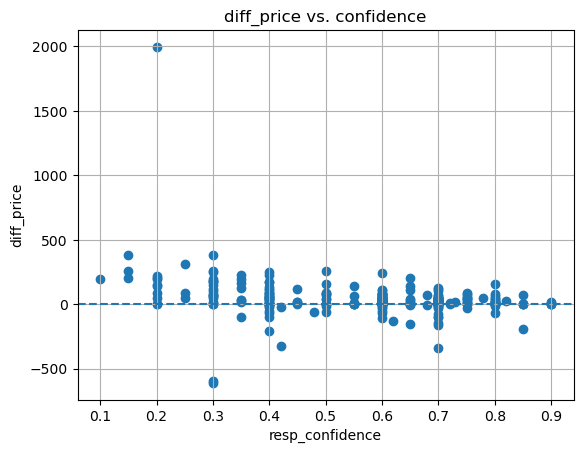

[skip] confidence == 100: no rows


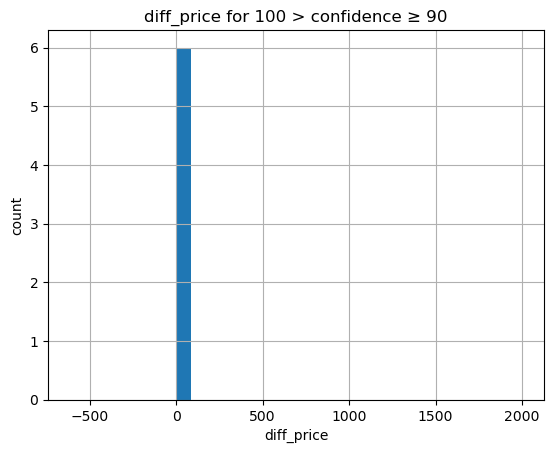

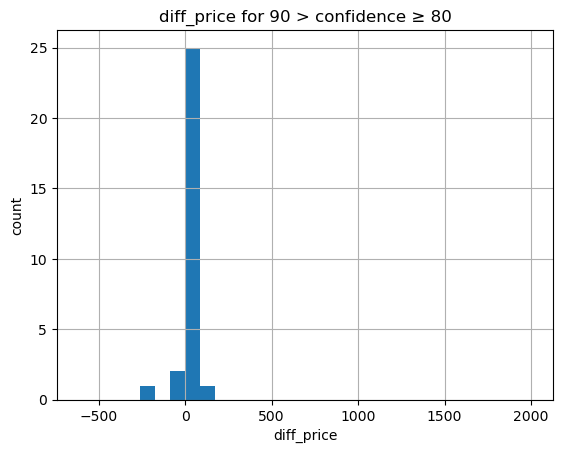

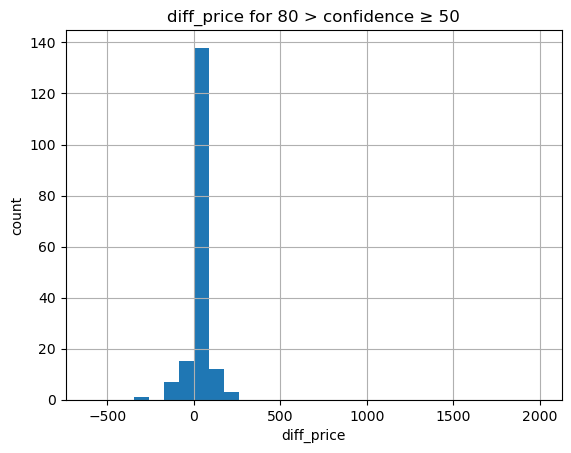

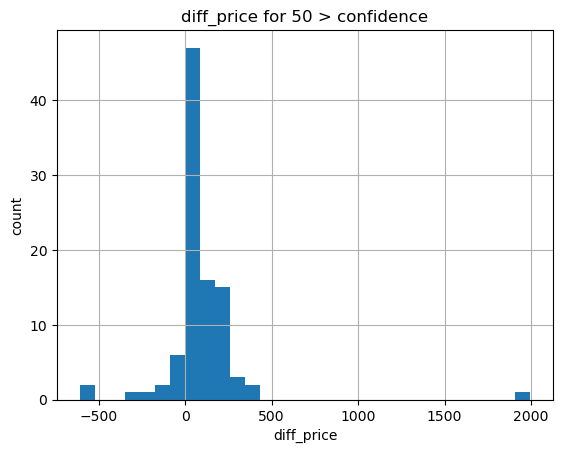

confidence == 100: 0 rows
100 > confidence ≥ 90: 6 rows
90 > confidence ≥ 80: 29 rows
80 > confidence ≥ 50: 176 rows
50 > confidence: 96 rows


In [7]:
from plot import plotPriceConfidence, histPriceDiff

plotPriceConfidence(data)
histPriceDiff(data)


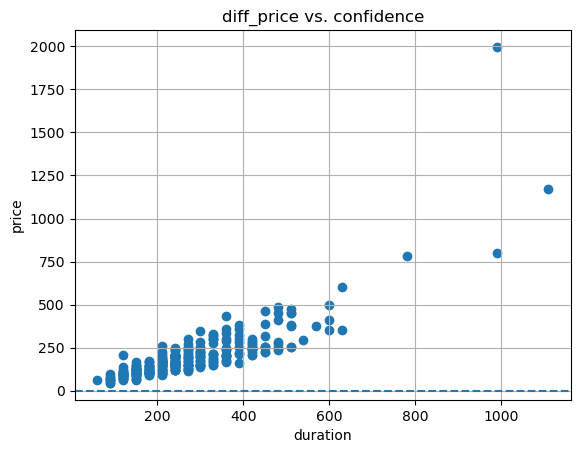

In [8]:
from plot import plotVariables

plotVariables(data["duration"],data["price"])

In [9]:
rate = data["price"]/data["duration"]*60
print(rate)
np.corrcoef(data["duration"],rate)

0      30.000000
1      48.333333
5      32.000000
6      50.000000
7      34.000000
         ...    
985    39.000000
988    46.666667
992    34.000000
996    34.285714
998    33.333333
Length: 307, dtype: float64


array([[1.        , 0.06179235],
       [0.06179235, 1.        ]])